Emotion of the Cryptocurrency Market: VADER sentiment analysis & classification using MultinomialNB, Logistic Regression, SGD classifier


In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
os.chdir("/content/drive/My Drive/data/twitter-emotion-cryptocurrency/")
os.listdir()

['anger.json',
 'fear.json',
 'greed.json',
 'hateful.json',
 'joy.json',
 'sadness.json']

In [0]:
import json
with open('anger.json') as json_file:
    anger = pd.read_json(json_file)
anger["emotion"] = "anger"
anger = anger.rename(columns={0:"body"})

with open('fear.json') as json_file:
    fear = pd.read_json(json_file)
fear["emotion"] = "fear"
fear = fear.rename(columns={0:"body"})

with open('greed.json') as json_file:
    greed = pd.read_json(json_file)
greed["emotion"] = "greed"
greed = greed.rename(columns={0:"body"})

with open('hateful.json') as json_file:
    hateful = pd.read_json(json_file)
hateful["emotion"] = "hateful"
hateful = hateful.rename(columns={0:"body"})

with open('joy.json') as json_file:
    joy = pd.read_json(json_file)
joy["emotion"] = "joy"
joy = joy.rename(columns={0:"body"})

with open('sadness.json') as json_file:
    sadness = pd.read_json(json_file)
sadness["emotion"] = "sadness"
sadness = sadness.rename(columns={0:"body"})        
             
df = pd.concat([anger,fear,greed,hateful,joy,sadness], ignore_index=True)
df["id"] = df.index + 1
df = df[['id', 'body', 'emotion']]

In [0]:
import nltk 
import string
import re
#removing 
def punctuation_removal(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    text = re.sub(r"http\S+", "", text)
    return text

df['body_punctuation'] = df['body'].apply(lambda x: punctuation_removal(x))
anger['body_punctuation'] = anger['body'].apply(lambda x: punctuation_removal(x))
fear['body_punctuation'] = fear['body'].apply(lambda x: punctuation_removal(x))
greed['body_punctuation'] = greed['body'].apply(lambda x: punctuation_removal(x))
hateful['body_punctuation'] = hateful['body'].apply(lambda x: punctuation_removal(x))
joy['body_punctuation'] = joy['body'].apply(lambda x: punctuation_removal(x))
sadness['body_punctuation'] = sadness['body'].apply(lambda x: punctuation_removal(x))

In [0]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

df['body_tokenized'] = df['body_punctuation'].apply(lambda x: tokenization(x.lower()))
anger['body_tokenized'] = anger['body_punctuation'].apply(lambda x: tokenization(x.lower()))
fear['body_tokenized'] = fear['body_punctuation'].apply(lambda x: tokenization(x.lower()))
greed['body_tokenized'] = greed['body_punctuation'].apply(lambda x: tokenization(x.lower()))
hateful['body_tokenized'] = hateful['body_punctuation'].apply(lambda x: tokenization(x.lower()))
joy['body_tokenized'] = joy['body_punctuation'].apply(lambda x: tokenization(x.lower()))
sadness['body_tokenized'] = sadness['body_punctuation'].apply(lambda x: tokenization(x.lower()))

In [0]:
nltk.download("stopwords")
stopword = nltk.corpus.stopwords.words('english')
stopword.extend(['https','co','Listia','Join','using','RT','stuff','Info',
                 'rt','code','xnk','btc','bitcoin','ether','eth','ethereum',
                 'ripple','xrp','ltc','listia','join','selling','buying','info',
                 'crypto','cryptocurrency','blockchain','one','project','team',
                 'people','cindxtoken','btcusd','exchange','exchanges','new', 'york',
                 'london','time','timeframe','amp','stock','market','learn','think',
                 'utc','xb','bch','read','cindx','ooobtc','cmhkvj','dmtthl','cdfqlk',
                 'dpxxgj','bkbfsr','httpstcopeaenjdzs','httpstcoasyzapmtz','httpstconufwlfbsw',
                 'httpstcomluwxepaa','httpstcorfdpovmdu','httpstcosouopvw','httpstcofutdfvalum',
                 'cnnclinton','baracudabella','cqswnf','bcbtmh','dbbhrd'])


def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text

df['body_stopwordremoved'] = df['body_tokenized'].apply(lambda x: remove_stopwords(x))
anger['body_stopwordremoved'] = anger['body_tokenized'].apply(lambda x: remove_stopwords(x))
fear['body_stopwordremoved'] = fear['body_tokenized'].apply(lambda x: remove_stopwords(x))
greed['body_stopwordremoved'] = greed['body_tokenized'].apply(lambda x: remove_stopwords(x))
hateful['body_stopwordremoved'] = hateful['body_tokenized'].apply(lambda x: remove_stopwords(x))
joy['body_stopwordremoved'] = joy['body_tokenized'].apply(lambda x: remove_stopwords(x))
sadness['body_stopwordremoved'] = sadness['body_tokenized'].apply(lambda x: remove_stopwords(x))
df.head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,body,emotion,body_punctuation,body_tokenized,body_stopwordremoved
0,1,@amritabithi You're gonna hate it when it is a...,anger,amritabithi Youre gonna hate it when it is a t...,"[amritabithi, youre, gonna, hate, it, when, it...","[amritabithi, youre, gonna, hate, token, runni..."
1,2,RT @stauffelbaker: Everyone loves to hate #eos...,anger,RT stauffelbaker Everyone loves to hate eosio ...,"[rt, stauffelbaker, everyone, loves, to, hate,...","[stauffelbaker, everyone, loves, hate, eosio, ..."
2,3,"RT @dilan_chi2012: #IfIWas a mad scientist, I'...",anger,RT dilanchi IfIWas a mad scientist Ill make a ...,"[rt, dilanchi, ifiwas, a, mad, scientist, ill,...","[dilanchi, ifiwas, mad, scientist, ill, make, ..."
3,4,Bitcoin Cash Price Turns Bullish yet BCH Hate ...,anger,Bitcoin Cash Price Turns Bullish yet BCH Hate ...,"[bitcoin, cash, price, turns, bullish, yet, bc...","[cash, price, turns, bullish, yet, hate, wont,..."
4,5,I see the Tesla fanboys are angry at the idea ...,anger,I see the Tesla fanboys are angry at the idea ...,"[i, see, the, tesla, fanboys, are, angry, at, ...","[see, tesla, fanboys, angry, idea, thieving, e..."
5,6,The buzz is officially back!\n\nLove it or hat...,anger,The buzz is officially back\n\nLove it or hate...,"[the, buzz, is, officially, back, love, it, or...","[buzz, officially, back, love, hate, stay, tho..."
6,7,"Now, youre just trying to scare them. Move alo...",anger,Now youre just trying to scare them Move along...,"[now, youre, just, trying, to, scare, them, mo...","[youre, trying, scare, move, along, tone, amus..."
7,8,I hate cryptocurrencies with a burning passion...,anger,I hate cryptocurrencies with a burning passion...,"[i, hate, cryptocurrencies, with, a, burning, ...","[hate, cryptocurrencies, burning, passion, nev..."
8,9,@CCNMarkets no single market participant shoul...,anger,CCNMarkets no single market participant should...,"[ccnmarkets, no, single, market, participant, ...","[ccnmarkets, single, participant, allowed, pri..."
9,10,Icon sucks!,anger,Icon sucks,"[icon, sucks]","[icon, sucks]"


In [0]:
Stemmer = nltk.PorterStemmer()
#Stemming
def stemming(text):
    text = [Stemmer.stem(word) for word in text]
    return text

df['body_stemmed'] = df['body_stopwordremoved'].apply(lambda x: stemming(x))
anger['body_stemmed'] = anger['body_stopwordremoved'].apply(lambda x: stemming(x))
fear['body_stemmed'] = fear['body_stopwordremoved'].apply(lambda x: stemming(x))
greed['body_stemmed'] = greed['body_stopwordremoved'].apply(lambda x: stemming(x))
hateful['body_stemmed'] = hateful['body_stopwordremoved'].apply(lambda x: stemming(x))
joy['body_stemmed'] = joy['body_stopwordremoved'].apply(lambda x: stemming(x))
sadness['body_stemmed'] = sadness['body_stopwordremoved'].apply(lambda x: stemming(x))
df.head()

,id,body,emotion,body_punctuation,body_tokenized,body_stopwordremoved,body_stemmed
0,1,@amritabithi You're gonna hate it when it is a...,anger,amritabithi Youre gonna hate it when it is a t...,"[amritabithi, youre, gonna, hate, it, when, it...","[amritabithi, youre, gonna, hate, token, runni...","[amritabithi, your, gonna, hate, token, run, f..."
1,2,RT @stauffelbaker: Everyone loves to hate #eos...,anger,RT stauffelbaker Everyone loves to hate eosio ...,"[rt, stauffelbaker, everyone, loves, to, hate,...","[stauffelbaker, everyone, loves, hate, eosio, ...","[stauffelbak, everyon, love, hate, eosio, keep..."
2,3,"RT @dilan_chi2012: #IfIWas a mad scientist, I'...",anger,RT dilanchi IfIWas a mad scientist Ill make a ...,"[rt, dilanchi, ifiwas, a, mad, scientist, ill,...","[dilanchi, ifiwas, mad, scientist, ill, make, ...","[dilanchi, ifiwa, mad, scientist, ill, make, m..."
3,4,Bitcoin Cash Price Turns Bullish yet BCH Hate ...,anger,Bitcoin Cash Price Turns Bullish yet BCH Hate ...,"[bitcoin, cash, price, turns, bullish, yet, bc...","[cash, price, turns, bullish, yet, hate, wont,...","[cash, price, turn, bullish, yet, hate, wont, ..."
4,5,I see the Tesla fanboys are angry at the idea ...,anger,I see the Tesla fanboys are angry at the idea ...,"[i, see, the, tesla, fanboys, are, angry, at, ...","[see, tesla, fanboys, angry, idea, thieving, e...","[see, tesla, fanboy, angri, idea, thiev, eu, c..."


In [0]:
import nltk
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()
#Lemmatization
def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df['body_lemma'] = df['body_stopwordremoved'].apply(lambda x: lemmatizer(x))
anger['body_lemma'] = anger['body_stopwordremoved'].apply(lambda x: lemmatizer(x))
fear['body_lemma'] = fear['body_stopwordremoved'].apply(lambda x: lemmatizer(x))
greed['body_lemma'] = greed['body_stopwordremoved'].apply(lambda x: lemmatizer(x))
hateful['body_lemma'] = hateful['body_stopwordremoved'].apply(lambda x: lemmatizer(x))
joy['body_lemma'] = joy['body_stopwordremoved'].apply(lambda x: lemmatizer(x))
sadness['body_lemma'] = sadness['body_stopwordremoved'].apply(lambda x: lemmatizer(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
df['body_lemmastring'] = df['body_lemma'].agg(lambda x: ' '.join(map(str, x)))
df.tail(-100000)

,id,body,emotion,body_punctuation,body_tokenized,body_stopwordremoved,body_lemma,body_lemmastring
100000,100001,RT @DigitalVillain: Tech companies still care ...,greed,RT DigitalVillain Tech companies still care mo...,"[rt, digitalvillain, tech, companies, still, c...","[digitalvillain, tech, companies, still, care,...","[digitalvillain, tech, company, still, care, a...",digitalvillain tech company still care ai iot ...
100001,100002,All the commenters saying he could pay a lower...,greed,All the commenters saying he could pay a lower...,"[all, the, commenters, saying, he, could, pay,...","[commenters, saying, could, pay, lower, fee, w...","[commenters, saying, could, pay, lower, fee, w...",commenters saying could pay lower fee wait mis...
100002,100003,Senior Research Scientist - #Robotics Startup!...,greed,Senior Research Scientist Robotics Startup C...,"[senior, research, scientist, robotics, startu...","[senior, research, scientist, robotics, startu...","[senior, research, scientist, robotics, startu...",senior research scientist robotics startup cyb...
100003,100004,Current Top 3 Dapps by VolumeLastDay\n\n1. Kyb...,greed,Current Top Dapps by VolumeLastDay\n\n Kyber ...,"[current, top, dapps, by, volumelastday, kyber...","[current, top, dapps, volumelastday, kyber, id...","[current, top, dapps, volumelastday, kyber, id...",current top dapps volumelastday kyber idex for...
100004,100005,RT @c0insbit: We are pleased to announce that ...,greed,RT cinsbit We are pleased to announce that For...,"[rt, cinsbit, we, are, pleased, to, announce, ...","[cinsbit, pleased, announce, fortem, capital, ...","[cinsbit, pleased, announce, fortem, capital, ...",cinsbit pleased announce fortem capital token ...
...,...,...,...,...,...,...,...,...
328357,328358,"@zackvoell Bitcoin is digital gold, it does ev...",sadness,zackvoell Bitcoin is digital gold it does ever...,"[zackvoell, bitcoin, is, digital, gold, it, do...","[zackvoell, digital, gold, every, function, go...","[zackvoell, digital, gold, every, function, go...",zackvoell digital gold every function gold bet...
328358,328359,Bitcoin [BTC] will never see adoption if princ...,sadness,Bitcoin BTC will never see adoption if princip...,"[bitcoin, btc, will, never, see, adoption, if,...","[never, see, adoption, principles, privacy, fu...","[never, see, adoption, principle, privacy, fun...",never see adoption principle privacy fungibili...
328359,328360,BlockBits: Incent Targets Broken Economy With ...,sadness,BlockBits Incent Targets Broken Economy With B...,"[blockbits, incent, targets, broken, economy, ...","[blockbits, incent, targets, broken, economy, ...","[blockbits, incent, target, broken, economy, r...",blockbits incent target broken economy reward ...
328360,328361,So sad that I cant be there... but so proud to...,sadness,So sad that I cant be there but so proud to be...,"[so, sad, that, i, cant, be, there, but, so, p...","[sad, cant, proud, watching, world, getting, d...","[sad, cant, proud, watching, world, getting, d...",sad cant proud watching world getting decentra...


After experimentation, it is found that the names of the actual currencies that we are analysing are not important as we try to remain focused on opinion and emotions. Hence, They are removed , along with many other words from the list of stop words.

(-0.5, 399.5, 199.5, -0.5)

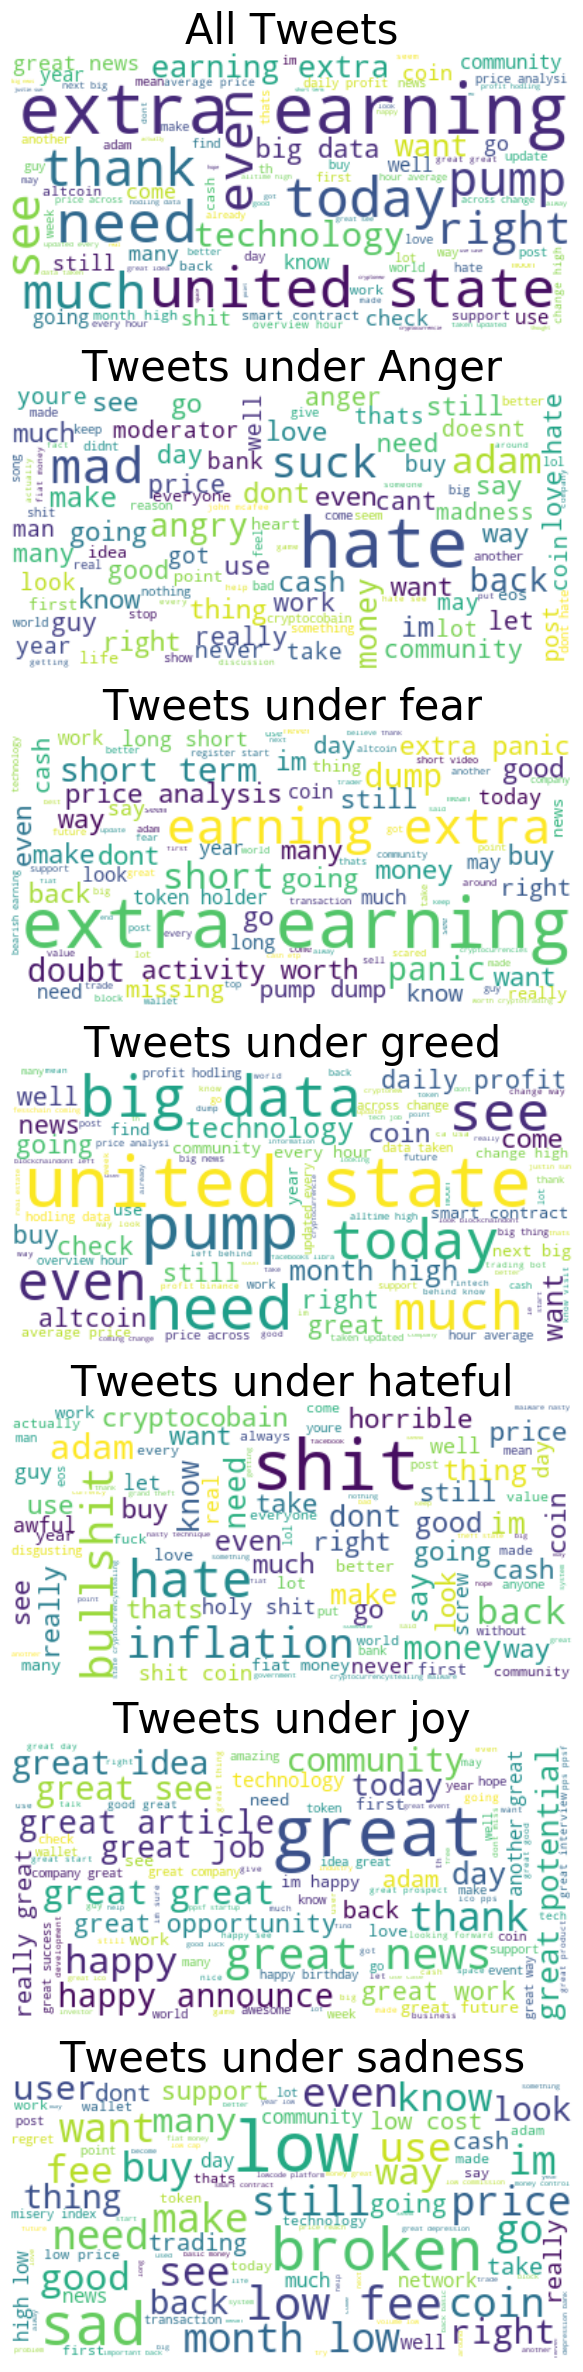

In [0]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
import itertools
fig, ax = plt.subplots(7, 1, figsize  = (30,30))
#create strings for wordclouds
tweet_all = ' '.join(list(itertools.chain.from_iterable(df.body_lemma)))
tweet_anger = ' '.join(list(itertools.chain.from_iterable(anger.body_lemma)))
tweet_fear = ' '.join(list(itertools.chain.from_iterable(fear.body_lemma)))
tweet_greed = ' '.join(list(itertools.chain.from_iterable(greed.body_lemma)))
tweet_hateful = ' '.join(list(itertools.chain.from_iterable(hateful.body_lemma)))
tweet_joy = ' '.join(list(itertools.chain.from_iterable(joy.body_lemma)))
tweet_sadness = ' '.join(list(itertools.chain.from_iterable(sadness.body_lemma)))
#create wordclouds
wordcloud_all = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_all)
wordcloud_anger = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_anger)
wordcloud_fear = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_fear)
wordcloud_greed = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_greed)
wordcloud_hateful = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_hateful)
wordcloud_joy = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_joy)
wordcloud_sadness = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_sadness)

#displaying the wordclouds
ax[0].imshow(wordcloud_all, interpolation='bilinear')
ax[0].set_title('All Tweets', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_anger, interpolation='bilinear')
ax[1].set_title('Tweets under Anger',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_fear, interpolation='bilinear')
ax[2].set_title('Tweets under fear',fontsize=30)
ax[2].axis('off')
ax[3].imshow(wordcloud_greed, interpolation='bilinear')
ax[3].set_title('Tweets under greed',fontsize=30)
ax[3].axis('off')
ax[4].imshow(wordcloud_hateful, interpolation='bilinear')
ax[4].set_title('Tweets under hateful',fontsize=30)
ax[4].axis('off')
ax[5].imshow(wordcloud_joy, interpolation='bilinear')
ax[5].set_title('Tweets under joy',fontsize=30)
ax[5].axis('off')
ax[6].imshow(wordcloud_sadness, interpolation='bilinear')
ax[6].set_title('Tweets under sadness',fontsize=30)
ax[6].axis('off')

#wordcloud.to_file("img/wordclouds.png")

In [0]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm import tnrange, tqdm_notebook, tqdm
analyzer = SentimentIntensityAnalyzer()
compound = []
for i,s in enumerate(tqdm(df['body_punctuation'])):
    vs = analyzer.polarity_scores(s)
    compound.append(vs["compound"])
df["compound"] = compound

100%|██████████| 328362/328362 [02:11<00:00, 2494.58it/s]


VADER (Valence Aware Dictionary and sentiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. VADER uses a combination of A sentiment lexicon is a list of lexical features (e.g., words) which are generally labelled according to their semantic orientation as either positive or negative.
VADER has been found to be quite successful when dealing with social media texts, NY Times editorials, movie reviews, and product reviews. This is because VADER not only tells about the Positivity and Negativity score but also tells us about how positive or negative a sentiment is.
Additionally, VADER can also handle emoji's , slangs, emoticons.

In [0]:
pip install "notebook>=5.3" "ipywidgets>=7.2"

In [0]:
import plotly.graph_objects as go
layout = go.Layout(
    title=go.layout.Title(
        text='VADER sentiment intensity by emotion',
        xref='paper',
        x=0
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text='Emotion',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text='VADER polarity score',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    )
)

fig = go.Figure(layout= layout)

emos = ['anger', 'fear', 'greed', 'hateful', 'joy', 'sadness']

for emotion in emos:
    fig.add_trace(go.Violin(x=df['emotion'][df['emotion'] == emotion],
                            y=df['compound'][df['emotion'] == emotion],
                            name=emotion,
                            box_visible=True,
                            meanline_visible=True))

fig.show()




Output hidden; open in https://colab.research.google.com to view.

In [0]:
training_data = df.sample(frac=1)[:int(0.7*len(df))]
test_data = df.sample(frac=1)[int(0.7*len(df)):]  

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split
X, y = df.body_lemma ,df.emotion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [0]:
market_emotions = sorted(df["emotion"].unique())
print(market_emotions)

['anger', 'fear', 'greed', 'hateful', 'joy', 'sadness']


Text(0, 0.5, 'No. of tweets')

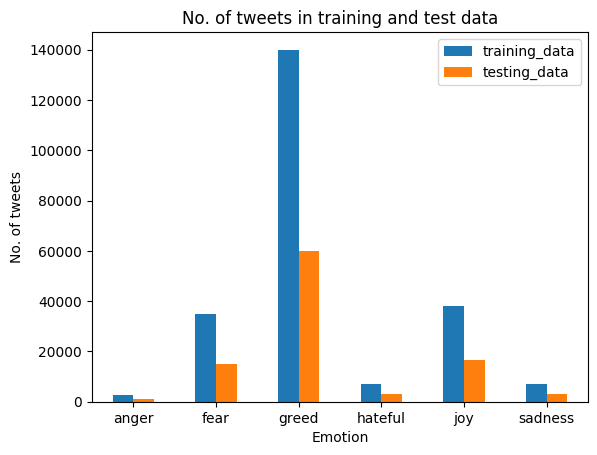

In [0]:
import matplotlib.pyplot as plt
#matplotlib inline
market_emotions_training = training_data.groupby('emotion').size().tolist()
market_emotions_test = test_data.groupby('emotion').size().tolist()
datatoplot = pd.DataFrame({'training_data': market_emotions_training,'testing_data': market_emotions_test}, index=market_emotions)
ax = datatoplot.plot.bar(rot=0)
ax.set_title('No. of tweets in training and test data')
ax.set_xlabel("Emotion")
ax.set_ylabel("No. of tweets")

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

text_clf = Pipeline([
     ('vect', CountVectorizer()),
     ('clf', MultinomialNB()), 
])

In [0]:
text_clf.fit(training_data.body_lemmastring, training_data.emotion)
#Pipeline(...)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [0]:
import numpy as np
predicted = text_clf.predict(test_data.body_lemmastring)
print('The Accuracy is %s' % np.mean(predicted == test_data.emotion))

The Accuracy is 0.8669360159985382


In [0]:
cr = classification_report(y_true = test_data.emotion,
                      y_pred = predicted,
                      labels=None, target_names=market_emotions,
                      sample_weight=None, digits=2,
                      output_dict=False)
print('The Accuracy is %s' % accuracy_score(predicted, test_data.emotion))
print(cr)

The Accuracy is 0.8669360159985382
              precision    recall  f1-score   support

       anger       0.71      0.20      0.31      1030
        fear       0.90      0.76      0.82     15013
       greed       0.88      0.93      0.90     59785
     hateful       0.70      0.71      0.71      3062
         joy       0.81      0.90      0.85     16613
     sadness       0.86      0.45      0.59      3006

    accuracy                           0.87     98509
   macro avg       0.81      0.66      0.70     98509
weighted avg       0.87      0.87      0.86     98509



Text(50.722222222222214, 0.5, 'Predicted Class label')

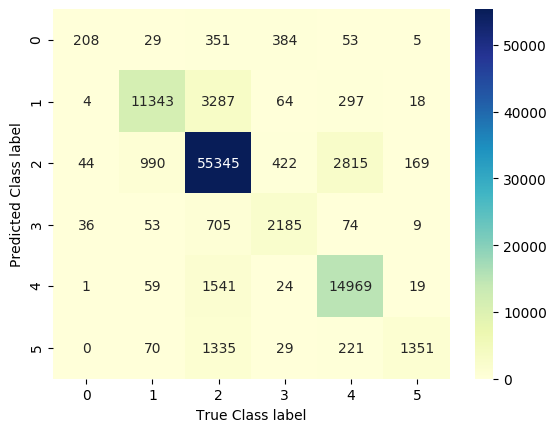

In [0]:
#Confusion Matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_data.emotion, predicted)
sns.heatmap(cm,annot=True,fmt="d",cmap="YlGnBu")
plt.xlabel("True Class label")
plt.ylabel("Predicted Class label")

In [0]:
#baseline accuracy
print('The Accuracy is %s' % np.mean(test_data.emotion == training_data.emotion.mode()[0]))

The Accuracy is 0.6068988620329107


In [0]:
#implement undersampling
emotionspeech_value_index = training_data.emotion.value_counts().index
random_xindices = []
under_sample_indices = []
for x in range(len(emotionspeech_value_index)):
    x_indices = training_data[training_data.emotion == training_data.emotion.value_counts().index[x]].index
    random_xindices = np.random.choice(x_indices,
                                       min(training_data.emotion.value_counts()),
                                       replace=False)
    under_sample_indices.append(training_data.loc[random_xindices])
    
#Get Balance Dataframe   
under_sample = pd.concat(under_sample_indices) 

[2525, 2525, 2525, 2525, 2525, 2525]

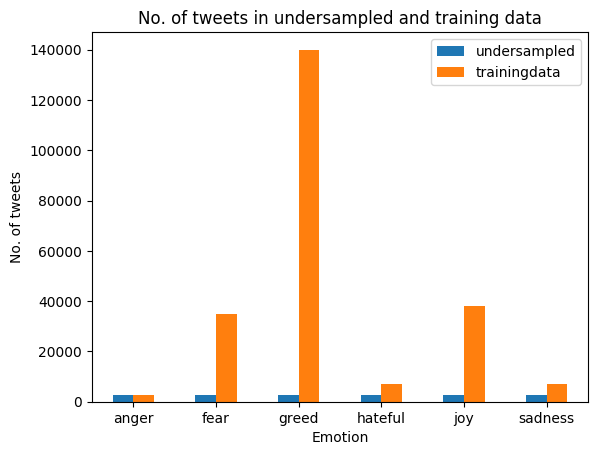

In [0]:
#matplotlib inline
undersamples = under_sample.emotion.value_counts().tolist()
trainingdata = training_data.emotion.value_counts().tolist()
df = pd.DataFrame({'undersampled': undersamples,'trainingdata': market_emotions_training},
                  index=market_emotions)
ax = df.plot.bar(rot=0)
ax.set_title('No. of tweets in undersampled and training data')
ax.set_xlabel("Emotion")
ax.set_ylabel("No. of tweets")

under_sample.emotion.value_counts().tolist()

In [0]:
text_clf.fit(under_sample.body_lemmastring, under_sample.emotion)
predicted_balance = text_clf.predict(test_data.body_lemmastring)
print('The Accuracy is %s' % np.mean(predicted_balance == test_data.emotion))

cr2 = classification_report(y_true = test_data.emotion,
                      y_pred = predicted_balance,
                      labels=None, target_names=market_emotions,
                      sample_weight=None, digits=2,
                      output_dict=False)
print('The Accuracy is %s' % accuracy_score(predicted_balance, test_data.emotion))
print(cr2)

The Accuracy is 0.673755697448964
The Accuracy is 0.673755697448964
              precision    recall  f1-score   support

       anger       0.15      0.93      0.26      1030
        fear       0.81      0.72      0.76     15013
       greed       0.96      0.58      0.72     59785
     hateful       0.33      0.79      0.46      3062
         joy       0.69      0.89      0.77     16613
     sadness       0.20      0.91      0.33      3006

    accuracy                           0.67     98509
   macro avg       0.52      0.80      0.55     98509
weighted avg       0.84      0.67      0.71     98509



Text(50.722222222222214, 0.5, 'Predicted Class label')

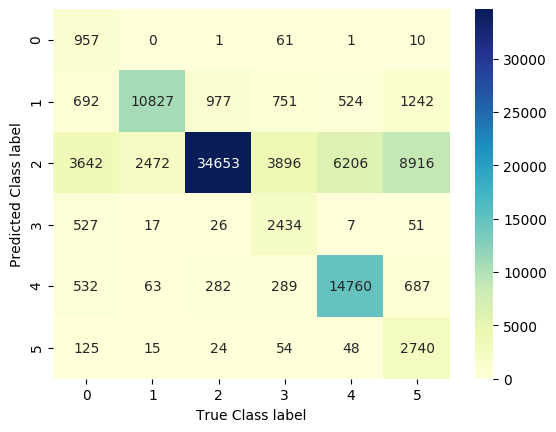

In [0]:
#Confusion Matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(test_data.emotion, predicted_balance)
sns.heatmap(cm2,annot=True,fmt="d",cmap="YlGnBu")
plt.xlabel("True Class label")
plt.ylabel("Predicted Class label")

In [0]:
#implement the grid search
from sklearn.model_selection import GridSearchCV
parameters = {
    'vect__ngram_range': [(1, 1), (1, 2)],
    'clf__alpha': (1, .1),
}

In [0]:
gs_clf = GridSearchCV(text_clf, parameters, cv=5, iid=False, n_jobs=-1)
gs_clf = gs_clf.fit(training_data.body_lemmastring, training_data.emotion)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning:

The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.



In [0]:
prediction3 = gs_clf.predict(test_data.body_lemmastring)

In [0]:
gs_clf.best_score_

0.8641697022420815

In [0]:
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

clf__alpha: 0.1
vect__ngram_range: (1, 2)


In [0]:
cv_results = pd.DataFrame(gs_clf.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__alpha,param_vect__ngram_range,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.394731,0.072175,1.068258,0.039178,1,"(1, 1)","{'clf__alpha': 1, 'vect__ngram_range': (1, 1)}",0.842227,0.841574,0.841900,0.842310,0.841070,0.841816,0.000455,3
1,13.983609,0.159054,1.956019,0.083506,1,"(1, 2)","{'clf__alpha': 1, 'vect__ngram_range': (1, 2)}",0.858389,0.857780,0.856736,0.855166,0.856928,0.857000,0.001093,2
2,5.347065,0.179617,1.048284,0.026050,0.1,"(1, 1)","{'clf__alpha': 0.1, 'vect__ngram_range': (1, 1)}",0.833612,0.833591,0.832721,0.832739,0.831651,0.832863,0.000721,4
3,13.348305,1.541696,1.781923,0.339827,0.1,"(1, 2)","{'clf__alpha': 0.1, 'vect__ngram_range': (1, 2)}",0.864784,0.864240,0.864915,0.863367,0.863541,0.864170,0.000629,1


In [0]:
print('accuracy %s' % accuracy_score(test_data.emotion, prediction3))

accuracy 0.9278543077282279


In [0]:
cm3 = classification_report(test_data.emotion, prediction3)
print(cm3)

              precision    recall  f1-score   support

       anger       0.58      0.75      0.66      1030
        fear       0.89      0.94      0.91     15013
       greed       0.98      0.92      0.95     59785
     hateful       0.74      0.83      0.78      3062
         joy       0.89      0.96      0.93     16613
     sadness       0.78      0.92      0.84      3006

    accuracy                           0.93     98509
   macro avg       0.81      0.89      0.85     98509
weighted avg       0.93      0.93      0.93     98509



In [0]:
# TODO: Write code here to search for a better model
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
lr = Pipeline([('vect', CountVectorizer()),
               ('clf', LogisticRegression(max_iter=500),),
              ])
lr.fit(training_data.body_lemmastring, training_data.emotion)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=500,
                                    multi_class='auto', n_jobs=None,
                          

In [0]:
predictions4 = lr.predict(test_data.body_lemmastring)
print('accuracy %s' % accuracy_score(predictions4, test_data.emotion))
print(classification_report(test_data.emotion, predictions4))

accuracy 0.9425128668446537
              precision    recall  f1-score   support

       anger       0.70      0.70      0.70      1030
        fear       0.93      0.88      0.90     15013
       greed       0.96      0.96      0.96     59785
     hateful       0.85      0.86      0.85      3062
         joy       0.94      0.97      0.95     16613
     sadness       0.87      0.88      0.87      3006

    accuracy                           0.94     98509
   macro avg       0.87      0.87      0.87     98509
weighted avg       0.94      0.94      0.94     98509



Text(50.722222222222214, 0.5, 'Predicted Class label')

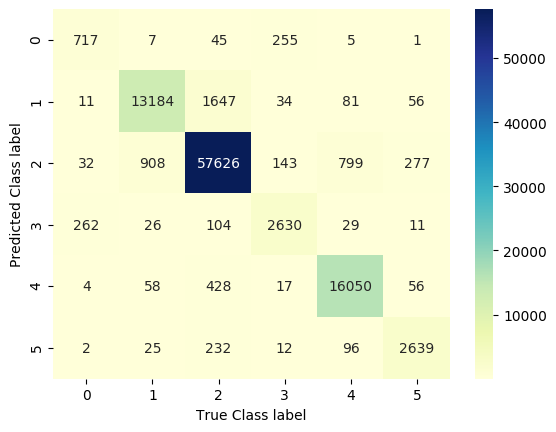

In [0]:
cm4 = confusion_matrix(test_data.emotion, predictions4)
sns.heatmap(cm4,annot=True,fmt="d",cmap="YlGnBu")
plt.xlabel("True Class label")
plt.ylabel("Predicted Class label")

In [0]:
#pipeline of feature engineering and model
from sklearn.linear_model import SGDClassifier
from time import time
import logging
from pprint import pprint
sgd = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', SGDClassifier(tol=1e-3)),
              ])
parameters = {
    'vect__max_df': (0.5, 0.75, 1.0),
     #'vect__max_features': (None, 5000, 10000, 50000),
    'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
     'tfidf__use_idf': (True, False),
     #'tfidf__norm': ('l1', 'l2'),
    'clf__max_iter': (20,),
    'clf__alpha': (0.00001, 0.000001),
    'clf__penalty': ('l2', 'elasticnet'),
     #'clf__max_iter': (10, 50, 80),
}

In [0]:
grid_search = GridSearchCV(sgd, parameters, cv=5,
                               n_jobs=-1, verbose=1)
print("Performing grid search...")
print("pipeline:", [name for name, _ in lr.steps])
print("parameters:")
pprint(parameters)
t0 = time()
grid_search.fit(training_data.body_lemmastring, training_data.emotion)
print("done in %0.3fs" % (time() - t0))
print()

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['vect', 'clf']
parameters:
{'clf__alpha': (1e-05, 1e-06),
 'clf__max_iter': (20,),
 'clf__penalty': ('l2', 'elasticnet'),
 'tfidf__use_idf': (True, False),
 'vect__max_df': (0.5, 0.75, 1.0),
 'vect__ngram_range': ((1, 1), (1, 2))}
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 25.9min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 33.4min finished


done in 2017.436s

Best score: 0.929
Best parameters set:
	clf__alpha: 1e-05
	clf__max_iter: 20
	clf__penalty: 'elasticnet'
	tfidf__use_idf: False
	vect__max_df: 0.75
	vect__ngram_range: (1, 2)


In [0]:
cv_results2 = pd.DataFrame(grid_search.cv_results_)
cv_results2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__alpha,param_clf__max_iter,param_clf__penalty,param_tfidf__use_idf,param_vect__max_df,param_vect__ngram_range,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,7.105780,0.114804,1.141441,0.026241,1e-05,20,l2,True,0.5,"(1, 1)","{'clf__alpha': 1e-05, 'clf__max_iter': 20, 'cl...",0.927171,0.926106,0.925453,0.925886,0.925408,0.926005,0.000640,19
1,18.185095,0.345574,2.128535,0.123121,1e-05,20,l2,True,0.5,"(1, 2)","{'clf__alpha': 1e-05, 'clf__max_iter': 20, 'cl...",0.927106,0.927171,0.925127,0.925625,0.925103,0.926027,0.000927,16
2,7.118392,0.219553,1.135067,0.029474,1e-05,20,l2,True,0.75,"(1, 1)","{'clf__alpha': 1e-05, 'clf__max_iter': 20, 'cl...",0.927237,0.926171,0.925388,0.925778,0.925408,0.925996,0.000683,21
3,18.155799,0.385065,2.404087,0.181181,1e-05,20,l2,True,0.75,"(1, 2)","{'clf__alpha': 1e-05, 'clf__max_iter': 20, 'cl...",0.926997,0.927041,0.925322,0.925691,0.925038,0.926018,0.000843,18
4,7.155153,0.241141,1.125313,0.104295,1e-05,20,l2,True,1,"(1, 1)","{'clf__alpha': 1e-05, 'clf__max_iter': 20, 'cl...",0.927150,0.926280,0.925562,0.925930,0.925082,0.926001,0.000699,20
5,18.362727,0.406107,2.322516,0.143523,1e-05,20,l2,True,1,"(1, 2)","{'clf__alpha': 1e-05, 'clf__max_iter': 20, 'cl...",0.927280,0.926910,0.925040,0.925712,0.925169,0.926022,0.000912,17
6,6.831528,0.300014,1.075586,0.053791,1e-05,20,l2,False,0.5,"(1, 1)","{'clf__alpha': 1e-05, 'clf__max_iter': 20, 'cl...",0.926171,0.925649,0.925866,0.924973,0.924712,0.925474,0.000548,22
7,17.428376,0.203911,1.986153,0.083814,1e-05,20,l2,False,0.5,"(1, 2)","{'clf__alpha': 1e-05, 'clf__max_iter': 20, 'cl...",0.927041,0.926584,0.925453,0.926082,0.925408,0.926114,0.000635,13
8,6.814770,0.222112,1.117789,0.080807,1e-05,20,l2,False,0.75,"(1, 1)","{'clf__alpha': 1e-05, 'clf__max_iter': 20, 'cl...",0.926758,0.925475,0.925061,0.924821,0.925038,0.925431,0.000697,23
9,17.213025,0.317818,2.252357,0.201613,1e-05,20,l2,False,0.75,"(1, 2)","{'clf__alpha': 1e-05, 'clf__max_iter': 20, 'cl...",0.927171,0.926823,0.925540,0.925756,0.925169,0.926092,0.000771,14


In [0]:
prediction5 = grid_search.predict(test_data.body_lemmastring)
print('accuracy %s' % accuracy_score(prediction5, test_data.emotion))
print(classification_report(test_data.emotion, prediction5))

accuracy 0.932534083180217
              precision    recall  f1-score   support

       anger       0.89      0.48      0.62      1030
        fear       0.94      0.82      0.87     15013
       greed       0.95      0.96      0.95     59785
     hateful       0.80      0.92      0.85      3062
         joy       0.92      0.98      0.95     16613
     sadness       0.84      0.86      0.85      3006

    accuracy                           0.93     98509
   macro avg       0.89      0.84      0.85     98509
weighted avg       0.93      0.93      0.93     98509



Text(50.722222222222214, 0.5, 'Predicted Class label')

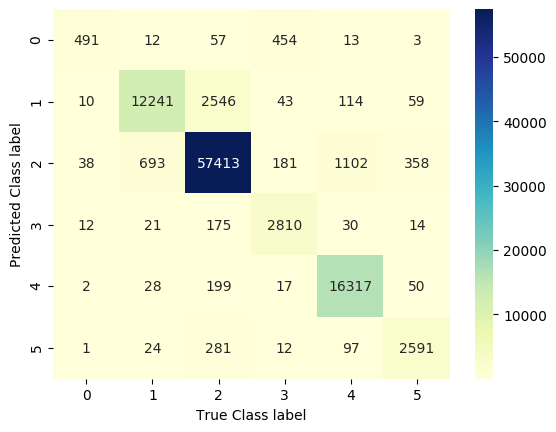

In [0]:
cm5 = confusion_matrix(test_data.emotion, prediction5)
sns.heatmap(cm5,annot=True,fmt="d",cmap="YlGnBu")
plt.xlabel("True Class label")
plt.ylabel("Predicted Class label")

Clustering

In [0]:
#vectorize the data
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english',use_idf=True)
tweets = tfidf_vectorizer.fit_transform(df['body_lemmastring'])
#print(vectorizer.get_feature_names())

In [0]:
tweets.shape

(328362, 139774)

In [0]:
# TODO: Enter code here to cluster the vectorized data
from sklearn.cluster import KMeans, MiniBatchKMeans
kmeans2 = KMeans(n_clusters=2,n_init=8,n_jobs=-1).fit(tweets)

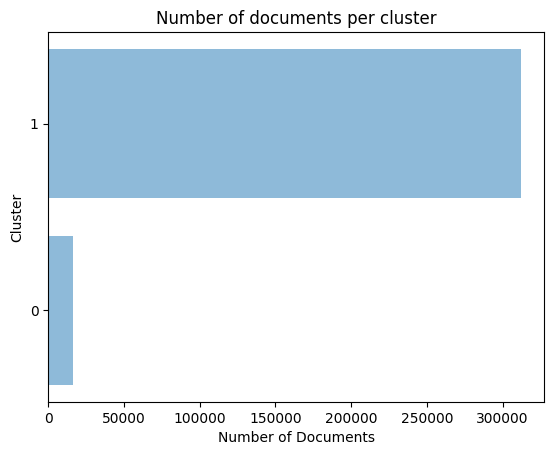

In [0]:
# TODO: Enter code here to produce a bar plot of the cluster size
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

cluster_labels = pd.DataFrame(kmeans2.labels_)


objects = ('0', '1')
y_pos = np.arange(len(objects))
counts = cluster_labels.groupby(0).size().tolist()

plt.barh(y_pos, counts, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Number of Documents')
plt.ylabel('Cluster')
plt.title('Number of documents per cluster')

plt.show()

In [0]:
#Summarise clusters
# TODO: Enter code here to compute the cluster summaries and print them
n = int(input("Enter your value: "))
centroids2 = pd.DataFrame(kmeans2.cluster_centers_).transpose()
for i in range(centroids2.shape[1]): 
    terms2 = dict(zip(tfidf_vectorizer.get_feature_names()
                      ,centroids2.iloc[:,i]))
    sortedterms2 = sorted(terms2.items(),key = lambda x:x[1],reverse=True)
    print("\n")
    print("The cluster number",i+1)
    print(pd.DataFrame(sortedterms2[:n]).rename(
        columns={0:"term",1:"Centroid"}))

Enter your value: 5


The cluster number 1
         term  Centroid
0       great  0.023696
1         big  0.015107
2  investment  0.013469
3        high  0.012302
4     bullish  0.012077


The cluster number 2
      term  Centroid
0    extra  0.392592
1  earning  0.392276
2   dgkrcz  0.008915
3   bmgvtw  0.008258
4   blbhtd  0.007843


In [0]:
#Tuning k-means algorithm with the elbow method
# plot for the elbow method
elbow_inertia = []
for x in range(1,10):
    kmeans = KMeans(n_clusters=x,n_init=8,n_jobs=-1).fit(tweets)
    inertias = kmeans.inertia_
    elbow_inertia.append(inertias)
print(elbow_inertia)

<function matplotlib.pyplot.show>

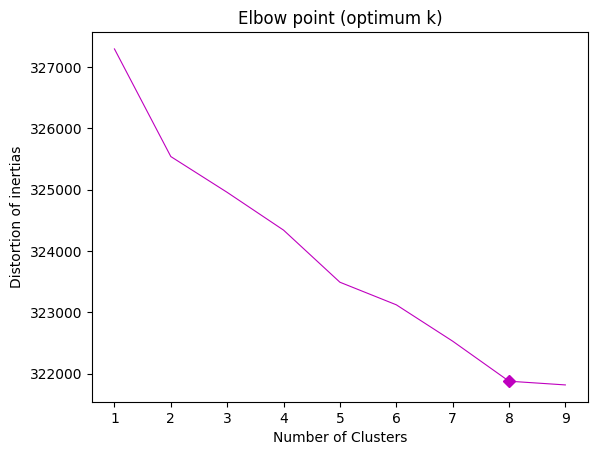

In [0]:
import matplotlib.pyplot as plt
#Elbow method
plt.plot(range(1,10),elbow_inertia
         ,marker = 'D',markevery=[7]
         ,color = 'm',linewidth = 0.8)
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion of inertias')
plt.title('Elbow point (optimum k)')
plt.show

In [0]:
kmeans5 = KMeans(n_clusters=5,n_init=8,n_jobs=-1).fit(tweets)
cluster_labels5 = pd.DataFrame(kmeans5.labels_)
objects2 = ('0', '1', '2', '3', '4')
y_pos2 = np.arange(len(objects2))
counts2 = cluster_labels2.groupby(0).size().tolist()

plt.barh(y_pos2, counts2, align='center', alpha=0.5)
plt.yticks(y_pos2, objects2)
plt.xlabel('Number of Documents')
plt.ylabel('Cluster')
plt.title('Number of documents per cluster')

plt.show()

NameError: ignored

In [0]:
# Clustering with k = 5
n = int(input("Enter your value: "))
centroids5 = pd.DataFrame(kmeans5.cluster_centers_).transpose()
for i in range(centroids5.shape[1]): 
    terms5 = dict(zip(tfidf_vectorizer.get_feature_names()
                      ,centroids5.iloc[:,i]))
    sortedterms5 = sorted(terms5.items(),key = lambda x:x[1],reverse=True)
    print("\n")
    print("The cluster number",i+1)
    print(pd.DataFrame(sortedterms5[:n]).rename(
        columns={0:"term",1:"Centroid"}))

Enter your value: 5


The cluster number 1
       term  Centroid
0      pump  0.372243
1   bullish  0.166772
2  overview  0.093527
3   average  0.092484
4      hour  0.080351


The cluster number 2
      term  Centroid
0   profit  0.214985
1      bot  0.048605
2     hour  0.047444
3    daily  0.046469
4  hodling  0.044921


The cluster number 3
         term  Centroid
0         big  0.018262
1  investment  0.016167
2        high  0.013241
3       price  0.011641
4     bullish  0.010723


The cluster number 4
      term  Centroid
0    extra  0.392592
1  earning  0.392276
2   dgkrcz  0.008915
3   bmgvtw  0.008258
4   blbhtd  0.007843


The cluster number 5
      term  Centroid
0    great  0.152530
1     good  0.015705
2  success  0.013361
3   future  0.013271
4     news  0.013144


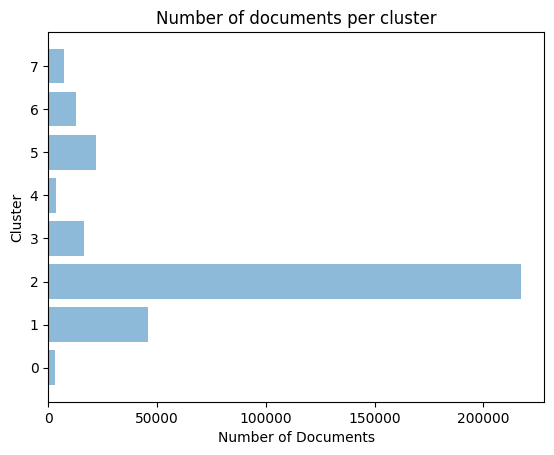

In [0]:
kmeans8 = KMeans(n_clusters=8,n_init=8,n_jobs=-1).fit(tweets)
cluster_labels2 = pd.DataFrame(kmeans8.labels_)
objects2 = ('0', '1', '2', '3', '4', '5', '6', '7')
y_pos2 = np.arange(len(objects2))
counts2 = cluster_labels2.groupby(0).size().tolist()

plt.barh(y_pos2, counts2, align='center', alpha=0.5)
plt.yticks(y_pos2, objects2)
plt.xlabel('Number of Documents')
plt.ylabel('Cluster')
plt.title('Number of documents per cluster')

plt.show()

In [0]:
# Clustering with k = 8
n = int(input("Enter your value: "))
centroids8 = pd.DataFrame(kmeans8.cluster_centers_).transpose()
for i in range(centroids8.shape[1]): 
    terms8 = dict(zip(tfidf_vectorizer.get_feature_names()
                      ,centroids8.iloc[:,i]))
    sortedterms8 = sorted(terms8.items(),key = lambda x:x[1],reverse=True)
    print("\n")
    print("The cluster number",i+1)
    print(pd.DataFrame(sortedterms8[:n]).rename(
        columns={0:"term",1:"Centroid"}))

Enter your value: 5


The cluster number 1
     term  Centroid
0    tron  0.208328
1     trx  0.140114
2     sun  0.104703
3  justin  0.104064
4     btt  0.034168


The cluster number 2
     term  Centroid
0   great  0.155437
1    good  0.015950
2  future  0.013456
3    idea  0.013038
4    news  0.012944


The cluster number 3
     term  Centroid
0     big  0.020329
1    high  0.014746
2    pump  0.013516
3   price  0.010538
4  profit  0.009615


The cluster number 4
      term  Centroid
0    extra  0.392616
1  earning  0.392275
2   dgkrcz  0.008915
3   bmgvtw  0.008258
4   blbhtd  0.007843


The cluster number 5
       term  Centroid
0      hour  0.271445
1    change  0.229521
2   average  0.176746
3  overview  0.174964
4   hodling  0.152745


The cluster number 6
         term  Centroid
0  investment  0.188003
1     ideafex  0.020215
2       money  0.019429
3     startup  0.018228
4         ico  0.016801


The cluster number 7
       term  Centroid
0   bullish  0.284586
1     price  

In [0]:
#Rand-index since we have gold standard class labels
#compute the Rand indices for the two clusterings
from sklearn import metrics
sample = df[0:10000]
sample_tweets = tfidf_vectorizer.fit_transform(sample["body_lemmastring"])
labels_true = sample.emotion.tolist()
kmeans3_sample = KMeans(n_clusters=3
                        ,n_init=8,n_jobs=-1).fit(sample_tweets)
kmeans5_sample = KMeans(n_clusters=5
                        ,n_init=8,n_jobs=-1).fit(sample_tweets)
kmeans8_sample = KMeans(n_clusters=8
                        ,n_init=8,n_jobs=-1).fit(sample_tweets)

In [0]:
#part of the function implemented here is referred from the link given below:
#https://stackoverflow.com/questions/49586742/rand-index-function-clustering-performance-evaluation
from scipy.special import comb
from itertools import combinations
import numpy as np

def rand_score (labels_true, labels_pred):
    my_pair = list(combinations(range(len(labels_true)), 2)) #create list of all combinations with the length of labels.
    def is_equal(x):
        return (x[0]==x[1])
    my_a = 0
    my_b = 0
    for i in range(len(my_pair)):
            if(is_equal((labels_true[my_pair[i][0]],labels_true[my_pair[i][1]])) == is_equal((labels_pred[my_pair[i][0]],labels_pred[my_pair[i][1]])) 
               and is_equal((labels_pred[my_pair[i][0]],labels_pred[my_pair[i][1]])) == True):
                my_a += 1
            if(is_equal((labels_true[my_pair[i][0]],labels_true[my_pair[i][1]])) == is_equal((labels_pred[my_pair[i][0]],labels_pred[my_pair[i][1]])) 
               and is_equal((labels_pred[my_pair[i][0]],labels_pred[my_pair[i][1]])) == False):
                my_b += 1
    my_denom = comb(len(labels_true),2)
    ri = (my_a + my_b) / my_denom
    return ri

In [0]:
#rand score for k=3
labels_pred = kmeans3_sample.predict(sample_tweets).tolist()
score = metrics.adjusted_rand_score(labels_true,labels_pred)
print("The rand index is",round(rand_score(labels_true, labels_pred)*100,2),"%")
print("The adjusted rand score is",round(score*100,2),"%")

The rand index is 50.74 %
The adjusted rand score is -0.09 %


In [0]:
#rand score for k=5
labels_pred = kmeans5_sample.predict(sample_tweets).tolist()
score = metrics.adjusted_rand_score(labels_true,labels_pred)
print("The rand index is",round(rand_score(labels_true, labels_pred)*100,2),"%")
print("The adjusted rand score is",round(score*100,2),"%")

The rand index is 55.62 %
The adjusted rand score is 13.39 %


In [0]:
#rand score for k=8
labels_pred = kmeans8_sample.predict(sample_tweets).tolist()
score = metrics.adjusted_rand_score(labels_true,labels_pred)
print("The rand index is",round(rand_score(labels_true, labels_pred)*100,2),"%")
print("The adjusted rand score is",round(score*100,2),"%")

The rand index is 59.59 %
The adjusted rand score is 22.33 %


*The rand index is calculated as $R=\frac{a+b}{\begin{pmatrix} n \\ 2\end{pmatrix}}$, where a is the number of times a pair of elements is grouped together by the clustering methods and b is when they are not. n refers to the number of elements present.
Here, we compare the given categories i.e true labels to the clustering with k=3,8; The adjusted rand index is the rand index adjusted for chance is between -1 and 1, which in our case shows that k=8 is effective.
ARI = (RI - Expected_RI) / (max(RI) - Expected_RI)
Disadvantages of Rand index:
-scale from 0 to 1 so it cannot be compared with a random set, ARI between -1 and 1 proves to useful here
-accountability due to overlap of pairs is absent, can be taken care with ARI
-High RI but low ARI, when there are many clusters, there is a higher chance that a pair of items in both sets are in different clusters.*

Prediction of the sentiment classification tagged #bitcoin or #crypto from today's date

In [0]:
import codecs
from bs4 import BeautifulSoup
import requests
import tweepy as tw

In [0]:
consumer_key= 'xvjAESJdj1AWMF9wwaNKZiqu8' 
consumer_secret= '6V6D8HyRJwnLc8v44yQ919srN7CENeO6fR2rrvlU1aWV0AsTQR'


access_token='31371694-CFWrUZXh2ChWth8SaQEnf68ibnVdQpNVpZ19mCxBG'
access_token_secret='3wKji7khqOUPtHupUiuJpCYvDX8TV4ClMppkgVuM6vgZN'
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth)

In [0]:
from datetime import date

# search terms and current date
search_words = "#bitcoin","#crypto"
date_since = date.today().strftime("%Y-%m-%d")
#date_since = date(2020, 2, 12)
#date_until= date(2020, 2, 13)

In [0]:
# Collect tweets
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items(500)

# Collect a list of tweets
[tweet.text for tweet in tweets]

['Tried to get some cash out of my @BBT ATM yesterday. Apparently it’s cleaned out of cash. Not withdraw allowed. Onl… https://t.co/A3JFCyZjB2',
 '#btc #Bitcoin #crypto \nMiddleman support (50k btc) is starting to take serious blows\n\nif we break him it will be an… https://t.co/1vcsZKZ2oU',
 "Looks like we'll have a busy week Zilliqans! 👀💥\n\n 📌New project update TOMORROW\n 📌Key appointment next week\n\nThank y… https://t.co/wImQYnD4j5",
 'RT @GraphcryptoO: 🔥300$ #FAVE #Giveaway🔥\n\n🔸Follow @GraphcryptoO &amp; @favinpayment &amp; 🔔\n🔸Like &amp; Retweet\n🔸Tag 2 friends or more...\n🔸Join telegra…',
 'US State Wants to Legally Seize Unclaimed Cryptocurrencies Left at Custodians | Via Bitcoin #bitcoin #cryptomunten… https://t.co/lOPNK8Vhzn',
 "It is interesting to observe the development. I'm with you. Good luck to everyone involved in the development of th… https://t.co/AX2l1f2JMo",
 'RT @TheCryptoLark: What are you doing in #crypto #bitcoin right now?',
 'RT @satoshi_babe: 💰 50$ Bitcoin

In [0]:
# Iterate and print tweets
for tweet in tweets:
    print(tweet.text)

In [0]:
new_search = " -filter:retweets".join(search_words)
new_search

'#bitcoin -filter:retweets#crypto'

In [0]:
tweets = tw.Cursor(api.search, 
                           q=new_search,
                           lang="en",
                           since=date_since).items(500)
users_locs = [[tweet.user.screen_name, tweet.user.location,tweet.text] for tweet in tweets]
users_locs

[['moncef_fahim',
  'New York, NY',
  '📈 Want to trade from 4am to 8pm 📈 Move to Webull and get 🔥 3 FREE STOCKS + 5 FREE STOCKS 🔥 if you deposit $2000. LI… https://t.co/YFG9wKPZfn'],
 ['Crypto556',
  '',
  'thanks for all my followers i will make many #Giveaways  in the future #altcoins  #ETH  \n\n Stay tuned for more 😁😉… https://t.co/5YjmswtvDS'],
 ['Mattsolid87',
  '',
  'Tried to get some cash out of my @BBT ATM yesterday. Apparently it’s cleaned out of cash. Not withdraw allowed. Onl… https://t.co/A3JFCyZjB2'],
 ['cryptzos',
  '',
  '#btc #Bitcoin #crypto \nMiddleman support (50k btc) is starting to take serious blows\n\nif we break him it will be an… https://t.co/1vcsZKZ2oU'],
 ['DomZilliqa',
  'Republic of Slovenia 🇸🇮',
  "Looks like we'll have a busy week Zilliqans! 👀💥\n\n 📌New project update TOMORROW\n 📌Key appointment next week\n\nThank y… https://t.co/wImQYnD4j5"],
 ['CoinStartNL',
  'Nederland',
  'US State Wants to Legally Seize Unclaimed Cryptocurrencies Left at Custodians

In [0]:
tweet_text = pd.DataFrame(data=users_locs, 
                    columns=['user', "location","text"])
tweet_text

,user,location,text
0,moncef_fahim,"New York, NY",📈 Want to trade from 4am to 8pm 📈 Move to Webu...
1,Crypto556,,thanks for all my followers i will make many #...
2,Mattsolid87,,Tried to get some cash out of my @BBT ATM yest...
3,cryptzos,,#btc #Bitcoin #crypto \nMiddleman support (50k...
4,DomZilliqa,Republic of Slovenia 🇸🇮,Looks like we'll have a busy week Zilliqans! 👀...
...,...,...,...
495,gridnetproject,,Wouldn't the #GRIDNET-Project be a good candid...
496,Drens,Mars,Bonus 5 BTC &amp; Bet by #bitcoin\n\nhttps://t...
497,Visible_Banking,London,"[REPORT] @JPMorgan Perspectives: #blockchain, ..."
498,cryptotothemoo1,"South East, England",Declining open interest in #CME #Bitcoin futur...


In [0]:
tweet_text['text'] = tweet_text['text'].apply(lambda x: punctuation_removal(x))
tweet_text['text'] = tweet_text['text'].apply(lambda x: tokenization(x.lower()))    
tweet_text['text'] = tweet_text['text'].apply(lambda x: remove_stopwords(x))
tweet_text['text'] = tweet_text['text'].apply(lambda x: lemmatizer(x))
tweet_text['text'] = tweet_text['text'].agg(lambda x: ' '.join(map(str, x)))

In [0]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm import tnrange, tqdm_notebook, tqdm
analyzer = SentimentIntensityAnalyzer()
compound = []
for i,s in enumerate(tqdm(tweet_text['text'])):
    vs = analyzer.polarity_scores(s)
    compound.append(vs["compound"])
tweet_text["compound"] = compound

100%|██████████| 500/500 [00:00<00:00, 5533.62it/s]


In [0]:
tweet_text['predicted_sentiment'] = lr.predict(tweet_text.text)

In [0]:
 tweet_text

,user,location,text,compound,predicted_sentiment
0,moncef_fahim,"New York, NY",want trade pm move webull get free stock free...,0.7845,greed
1,Crypto556,,thanks follower make many giveaway future altc...,0.4404,greed
2,Mattsolid87,,tried get cash bbt atm yesterday apparently cl...,0.0000,greed
3,cryptzos,,middleman support k starting take serious blow...,0.3400,greed
4,DomZilliqa,Republic of Slovenia 🇸🇮,look like well busy week zilliqans update tomo...,0.7269,greed
...,...,...,...,...,...
495,gridnetproject,,wouldnt gridnetproject good candidate opened o...,-0.5875,greed
496,Drens,Mars,bonus bet bet bet interwetten bahis iddaa,0.5423,greed
497,Visible_Banking,London,report jpmorgan perspective digitalcurrency,0.0000,greed
498,cryptotothemoo1,"South East, England",declining open interest cme future led trader ...,0.4588,greed


In [0]:
import plotly.graph_objects as go
layout = go.Layout(
    title=go.layout.Title(
        text='VADER sentiment intensity by emotion',
        xref='paper',
        x=0
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text='Emotion',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text='VADER polarity score',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    )
)
fig = go.Figure(layout= layout)



emos = ['anger', 'fear', 'greed', 'hateful', 'joy', 'sadness']

for emotion in emos:
    fig.add_trace(go.Violin(x=tweet_text['predicted_sentiment'][tweet_text['predicted_sentiment'] == emotion],
                            y=tweet_text['compound'][tweet_text['predicted_sentiment'] == emotion],
                            name=emotion,
                            box_visible=True,
                            meanline_visible=True))

fig.show()

In [0]:
 tweet_text.groupby('predicted_sentiment').count()

,user,location,text,compound
predicted_sentiment,,,,
anger,1,1,1,1
fear,40,40,40,40
greed,451,451,451,451
hateful,1,1,1,1
joy,5,5,5,5
sadness,2,2,2,2
